In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import xml.etree.ElementTree as Xet
import networkx as nx
import matplotlib.pyplot as plt

matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
])

In [2]:
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M']
index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M']

In [3]:
class Rank:
    def __init__(self, matrix, columns = None, index = None, lamda = 0.85, epsilon = 0.0):
        self.matrix = matrix
        self.columns = columns
        self.index = index
        self.lamda = lamda
        self.epsilon = epsilon
        if columns!= None and len(columns) != matrix.shape[1]:
            raise ValueError("number of columns")
        if index!= None and len(index) != matrix.shape[0]:
            raise ValueError("number of index")
        
        
    def __sumVal(self):
        dicSumm = {}
        for i in range(self.matrix.shape[0]):
            summ = 0
            for j in range(self.matrix.shape[1]):
                summ += self.matrix[i][j]
            dicSumm[str(i)] =  summ
        return dicSumm
    
    def transportation(self):
        matrixTransporation = []
        N = self.matrix.shape[0]
        dicSumm = self.__sumVal()
        for i in range(self.matrix.shape[0]):
            rowTrans = []
            rowTrans = [float("{:.4f}".format(self.lamda*(self.matrix[i][j]/dicSumm[str(i)]))) 
                        for j in range(self.matrix.shape[1])]
            matrixTransporation.append(rowTrans)
        matrixTransporation = pd.DataFrame(matrixTransporation, columns=self.columns, index=self.index).replace(
            [np.nan, np.inf, -np.inf],0)
        return matrixTransporation
    
    def teleportation(self):
        matrixTeleportation = []
        dicSumm = self.__sumVal()
        for i in range(self.matrix.shape[0]):
            rowTele = []
            for j in range(self.matrix.shape[1]):
                if dicSumm[str(i)] != 0:
                    rowTele.append(float("{:.4f}".format((1-self.lamda)*(1/self.matrix.shape[1]))))
                else:
                    rowTele.append(float("{:.4f}".format(1/self.matrix.shape[1])))
            matrixTeleportation.append(rowTele)
        matrixTeleportation = pd.DataFrame(matrixTeleportation, columns=self.columns, index=self.index).replace(
            [np.nan, np.inf, -np.inf],0)
        return matrixTeleportation
    
    def probabilite(self):
        return self.transportation() + self.teleportation()
    
    def pageRank(self):
        Ranks = []
        Ranks.append([float("{:.4f}".format(1/self.matrix.shape[0])) for i in range(self.matrix.shape[0])])
        Ranks.append(np.dot(Ranks[0],self.probabilite()))
        i = 0
        while LA.norm(Ranks[i]-Ranks[i+1]) >= self.epsilon:
            Ranks.append(np.dot(Ranks[i+1],self.probabilite()))
            i += 1
        Ranks.append(Ranks[len(Ranks)-1]*100)
        etapes = pd.DataFrame(Ranks, columns=self.columns)
        rank = etapes.iloc[len(Ranks)-1]
        return etapes, rank
    
    
    def display(self):
        _, ranks = self.pageRank()
        g = nx.DiGraph()
        if self.columns == None:
            self.columns = [l for l in range(self.matrix.shape[0])]
        for i in range(self.matrix.shape[0]): 
            g.add_node(self.columns[i])
            for j in range(self.matrix.shape[1]):
                if self.matrix[i][j] != 0:
                    g.add_edge(self.columns[i],self.columns[j],weight=self.matrix[i][j])
        pos = nx.spring_layout(g, k=5)
        nx.draw(g, pos, with_labels=True, font_color='white', 
                node_size=ranks*150, node_color=ranks, alpha=0.8)
        plt.show()

In [4]:
rank = Rank(matrix=matrix, columns=columns, index=index, lamda=0.85, epsilon=0.0006)

In [5]:
prob = rank.transportation()
prob

<ipython-input-3-0d17255ba0f2>:29: RuntimeWarning: invalid value encountered in long_scalars
  rowTrans = [float("{:.4f}".format(self.lamda*(self.matrix[i][j]/dicSumm[str(i)])))


,A,B,C,D,E,F,G,H,I,L,M
A,0.000,0.0000,0.00,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0
B,0.000,0.0000,0.85,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0
C,0.000,0.8500,0.00,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0
D,0.425,0.4250,0.00,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0
E,0.000,0.2833,0.00,0.2833,0.000,0.2833,0.0,0.0,0.0,0.0,0.0
F,0.000,0.4250,0.00,0.0000,0.425,0.0000,0.0,0.0,0.0,0.0,0.0
G,0.000,0.4250,0.00,0.0000,0.425,0.0000,0.0,0.0,0.0,0.0,0.0
H,0.000,0.4250,0.00,0.0000,0.425,0.0000,0.0,0.0,0.0,0.0,0.0
I,0.000,0.4250,0.00,0.0000,0.425,0.0000,0.0,0.0,0.0,0.0,0.0
L,0.000,0.0000,0.00,0.0000,0.850,0.0000,0.0,0.0,0.0,0.0,0.0


<ipython-input-3-0d17255ba0f2>:29: RuntimeWarning: invalid value encountered in long_scalars
  rowTrans = [float("{:.4f}".format(self.lamda*(self.matrix[i][j]/dicSumm[str(i)])))


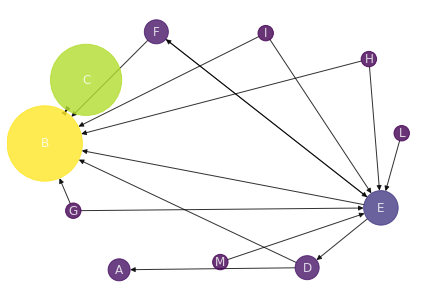

In [6]:
rank.display()